In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Načtení datasetu s podrobnostmi o knihách. Různá vydání nás v tuto chvíli nezajímají, proto odstraním duplicitní názvy.

In [24]:
books_df = pd.read_csv("BX-Books.csv", encoding='latin-1', on_bad_lines='skip', sep=';')
books_df = books_df.drop_duplicates(subset=['Book-Title'])
books_df

/Users/hedvikapajerova/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Načtení datasetu s podrobnostmi o uživatelích.

In [25]:
users_df = pd.read_csv("BX-Users.csv", encoding='latin-1', on_bad_lines='skip', sep=';')
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Načtení datasetu s hodnocením.

In [26]:
books_with_ratings_df = pd.read_csv("BX-Book-Ratings.csv", encoding='latin-1', on_bad_lines='skip', sep=';')
books_with_ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Budu potřebovat jen název knihy, ISBN, id uživatele a hodnocení knihy. Sloučím tedy dataset s údaji o knihách a dataset s hodnocením podle sloupce ISBN a zbytečné sloupce vymažu.

In [27]:
books_ratings_titles_complete_df = books_df.join(books_with_ratings_df.set_index('ISBN'), on='ISBN')
books_ratings_titles_complete_df = books_ratings_titles_complete_df.reset_index()
books_ratings_titles_complete_df = books_ratings_titles_complete_df.drop(columns=["index", "Book-Author", "Year-Of-Publication", "Publisher", "Image-URL-S", "Image-URL-M", "Image-URL-L"])
books_ratings_titles_complete_df

,ISBN,Book-Title,User-ID,Book-Rating
0,0195153448,Classical Mythology,2.0,0.0
1,0002005018,Clara Callan,8.0,5.0
2,0002005018,Clara Callan,11400.0,0.0
3,0002005018,Clara Callan,11676.0,8.0
4,0002005018,Clara Callan,41385.0,0.0
...,...,...,...,...
884148,0449906736,Flashpoints: Promise and Peril in a New World,276313.0,5.0
884149,0525447644,From One to One Hundred,276579.0,4.0
884150,006008667X,Lily Dale : The True Story of the Town that Ta...,276680.0,0.0
884151,0192126040,Republic (World's Classics),276680.0,0.0


Příprava dat pro doporučení, pokud chce uživatel doporučit četbu na základě málo hodnocené knihy, viz funkce recommender níže.

In [44]:
best_rated_books = pd.DataFrame(books_ratings_titles_complete_df.groupby('Book-Title')['Book-Rating'].median())
best_rated_books['num_of_ratings'] = pd.DataFrame(books_ratings_titles_complete_df.groupby('Book-Title')['Book-Rating'].count())
best_rated_books = best_rated_books[best_rated_books.num_of_ratings > 70]
best_rated_books = pd.DataFrame(best_rated_books.sort_values('Book-Rating',ascending=False).head(20))
best_rated_books

,Book-Rating,num_of_ratings
Book-Title,,
Harry Potter and the Goblet of Fire (Book 4),9.0,194
Harry Potter and the Prisoner of Azkaban (Book 3),9.0,197
Harry Potter and the Sorcerer's Stone (Book 1),8.0,168
Griffin &amp; Sabine: An Extraordinary Correspondence,8.0,72
Harry Potter and the Order of the Phoenix (Book 5),8.0,334
The Little Prince,8.0,79
The Giver (21st Century Reference),7.0,178
Fight Club,7.0,89
Into Thin Air : A Personal Account of the Mount Everest Disaster,7.0,75


Příprava dat pro vizualizaci rozložení, viz grafy níže.

In [30]:
ratings = pd.DataFrame(books_ratings_titles_complete_df.groupby('Book-Title')['Book-Rating'].mean())
ratings['num_of_ratings'] = pd.DataFrame(books_ratings_titles_complete_df.groupby('Book-Title')['Book-Rating'].count())
ratings = ratings[ratings.num_of_ratings > 70]
ratings

,Book-Rating,num_of_ratings
Book-Title,,
1984,4.614583,192
1st to Die: A Novel,3.498721,391
2010: Odyssey Two,2.721519,79
204 Rosewood Lane,1.704225,71
24 Hours,2.434211,76
...,...,...
Year of Wonders,4.331361,169
You Belong To Me,2.731707,123
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,3.119565,184


Vizualizace počtu udělených recenzí.

<AxesSubplot:>

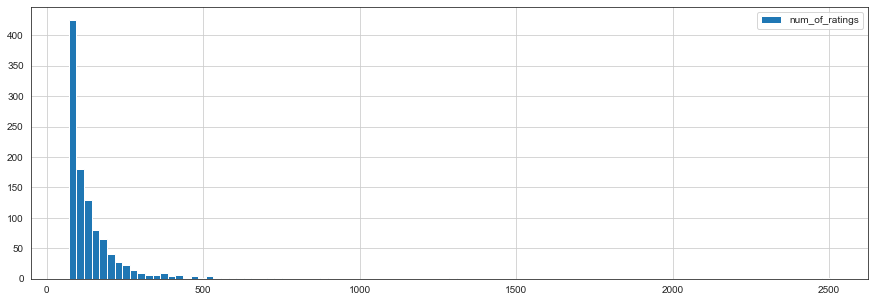

In [31]:
plt.figure(figsize=(15, 5))
ratings['num_of_ratings'].hist(bins=100, legend=True)

Vizualizace rozložení udělených hodnocení.

<AxesSubplot:>

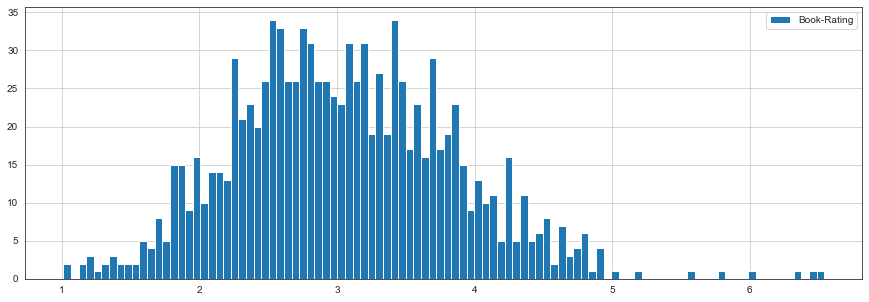

In [32]:
plt.figure(figsize=(15, 5))
ratings['Book-Rating'].hist(bins=100, legend=True)

Vizualizace počtu udělených recenzí a rozložení hodnocení knih.

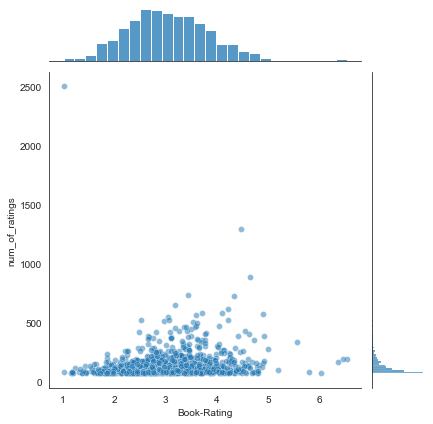

In [33]:
sns.jointplot(x='Book-Rating', y='num_of_ratings', data=ratings, alpha=0.5)

Vykreslit pivot tabulku (viz níže) z původního datasetu se ukázalo být velmi náročné na výpočetní výkon. Proto jsem se rozhodla dataset omezit počtem recenzí jednotlivých knih. Ukázalo se, že i doporučení podobných knih jsou tak přesnější.

Konkrétně se jedná o omezení datasetu tak, aby v něm byly jen knihy, které byly hodncoeny minimálně 70x.

In [36]:
more_than_70 = books_ratings_titles_complete_df.ISBN.value_counts()
books_ratings_titles_df = books_ratings_titles_complete_df[books_ratings_titles_complete_df.ISBN.isin(more_than_70.index[more_than_70.gt(70)])]
books_ratings_titles_df

,ISBN,Book-Title,User-ID,Book-Rating
98,0440234743,The Testament,277478.0,0.0
99,0440234743,The Testament,278144.0,0.0
100,0440234743,The Testament,9.0,0.0
101,0440234743,The Testament,243.0,0.0
102,0440234743,The Testament,388.0,0.0
...,...,...,...,...
676223,0310205719,The Purpose-Driven Life: What on Earth Am I He...,256407.0,9.0
676224,0310205719,The Purpose-Driven Life: What on Earth Am I He...,257700.0,9.0
676225,0310205719,The Purpose-Driven Life: What on Earth Am I He...,270006.0,0.0
676226,0310205719,The Purpose-Driven Life: What on Earth Am I He...,272810.0,8.0


Pivot tabulka: Podklad pro výpočet korelace.

In [39]:
booksmat = books_ratings_titles_df.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating').fillna(0)
booksmat

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,3rd Degree,4 Blondes,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Wish You Well,Without Remorse,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Writ of Execution,Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278836.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278843.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Funkce na doporučení knih.

In [57]:
def recommender(book_name):
    
    if book_name not in books_df.values:
        print("Book not found. Please try again.")
        
    else:
        
        if book_name in books_ratings_titles_df.values:

            print('Recommended books:')

            book_user_ratings = booksmat[book_name]
            similar_to_book = booksmat.corrwith(book_user_ratings)
            corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
            corr_book.dropna(inplace=True)
            corr_book = corr_book[corr_book.Correlation > 0]
            corr_book = corr_book.sort_values(by='Correlation', ascending=False)
            print(corr_book.head(21))

        else:

            print("This book has not been sufficiently evaluated yet to recommend similar books.\nWhy not read some of the best rated books?")
            print(best_rated_books.drop(columns=['num_of_ratings']))

Test: Kniha, která byla hodnocena alespoň 70x. Výsledkem je 20 knih s největší korelací.

In [60]:
recommender("To Kill a Mockingbird")

Recommended books:
                                                    Correlation
Book-Title                                                     
To Kill a Mockingbird                                  1.000000
Lord of the Flies                                      0.088729
The Catcher in the Rye                                 0.080184
Animal Farm                                            0.073336
A 2nd Helping of Chicken Soup for the Soul (Chi...     0.064871
Of Mice and Men (Penguin Great Books of the 20t...     0.061652
Mrs Dalloway                                           0.060662
Life's Little Instruction Book (Life's Little I...     0.060187
Black and Blue : A Novel                               0.059802
Wuthering Heights                                      0.059639
Drowning Ruth                                          0.059496
Tears of the Giraffe (No.1 Ladies Detective Age...     0.058750
The Remains of the Day (Vintage International)         0.056355
A Separate Peace     

Test: Kniha, která není v seznamu všech knih. Výsledkem je chybová hláška.

In [42]:
recommender("Antifragile")

Book not found. Please try again.


Test: Kniha, která byla hodnocena méně než 70x. Výstupem je výběr dvaceti knih hodnocených alespoň 70x s nejlepším mediánem všech hodnocení.

In [49]:
recommender("Flashpoints: Promise and Peril in a New World")

This book has not been sufficiently evaluated yet to recommend similar books.
Why not read some of the best rated books?
                                                    Book-Rating
Book-Title                                                     
Harry Potter and the Goblet of Fire (Book 4)                9.0
Harry Potter and the Prisoner of Azkaban (Book 3)           9.0
Harry Potter and the Sorcerer's Stone (Book 1)              8.0
Griffin &amp; Sabine: An Extraordinary Correspo...          8.0
Harry Potter and the Order of the Phoenix (Book 5)          8.0
The Little Prince                                           8.0
The Giver (21st Century Reference)                          7.0
Fight Club                                                  7.0
Into Thin Air : A Personal Account of the Mount...          7.0
Interpreter of Maladies                                     7.0
The Hobbit : The Enchanting Prelude to The Lord...          7.0
The Curious Incident of the Dog in the Night-Ti